In [5]:
!pip install lxml_html_clean



Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from facebook_scraper import get_posts
import requests
import os

# The identifier: could be page name, ID, or share link slug
artist_id = "1AcHaWGhLN"  # from https://www.facebook.com/share/1AcHaWGhLN/
saved_dir = "scraped_images"
os.makedirs(saved_dir, exist_ok=True)

# Fetch just 1 post
for post in get_posts(artist_id, pages=1):
    if 'image' in post and post['image']:
        img_url = post['image']
        caption = post.get('text') or ''
        print("📷 Found image:", img_url)
        
        # Download it
        try:
            r = requests.get(img_url)
            filename = os.path.join(saved_dir, f"{artist_id}_fb.jpg")
            with open(filename, 'wb') as f:
                f.write(r.content)
            print("✅ Saved image to", filename)
        except Exception as e:
            print("❌ Failed to download:", e)
    break


In [10]:
from facebook_scraper import get_posts
import requests
import os

# Example: Scrape the latest 5 pages of posts from a public profile
for post in get_posts("adiam.sibhatu", pages=5):
    print("Post Text:", post['text'][:200])  # Print first 200 characters
    if 'image' in post:
        print("Image URL:", post['image'])
    break  # remove this break if you want to process more posts


In [15]:
from facebook_scraper import get_posts
import os
import requests

# Facebook username from the actual profile
username = "adiam.sibhatuhabesha.5"
save_folder = "fb_images"

# Create folder if not exists
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Scrape public posts with image URLs
for i, post in enumerate(get_posts(username, pages=5)):
    print(f"\nPost {i+1}:")
    
    # Check if post has a main image
    if 'image' in post and post['image']:
        img_url = post['image']
        print("Image:", img_url)
        
        # Optional: download image
        response = requests.get(img_url)
        if response.status_code == 200:
            with open(os.path.join(save_folder, f"post_{i+1}_main.jpg"), 'wb') as f:
                f.write(response.content)
            print("Downloaded main image.")
    
    # Check if post has multiple images
    if 'images' in post and post['images']:
        for j, img_url in enumerate(post['images']):
            print(f"Image {j+1}:", img_url)
            
            # Optional: download each image
            response = requests.get(img_url)
            if response.status_code == 200:
                with open(os.path.join(save_folder, f"post_{i+1}_img_{j+1}.jpg"), 'wb') as f:
                    f.write(response.content)
                print(f"Downloaded image {j+1}.")



In [21]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import os
import requests

# --- USER CONFIGURATION ---
MAX_PHOTOS = 2
# --------------------------

# Setup Chrome options
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Setup WebDriver using manual path
from selenium.webdriver.chrome.service import Service
driver = webdriver.Chrome()

# Target URL
#url = "https://www.facebook.com/adiam.sibhatuhabesha.5/photos" 
url = "https://www.facebook.com/bini.yoni.50/photos"

save_folder = "fb_photos"

os.makedirs(save_folder, exist_ok=True)

# Open Facebook Photos Page
print("Opening URL...")
driver.get(url)
time.sleep(5)  # Wait for initial content to load

# Scroll to load more images
for _ in range(3):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)

# Get page source and parse with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Find all divs with the main photo container class
photo_containers = soup.find_all('div', class_='x78zum5 x1q0g3np x1a02dak')

count = 1
print(f"Found {len(photo_containers)} photo containers. Extracting image URLs...")

for container in photo_containers:
    if count > MAX_PHOTOS:
        print(f"Reached limit of {MAX_PHOTOS} photos.")
        break

    img_tag = container.find('img', {'src': True})
    if img_tag:
        img_url = img_tag['src']
        
        # Skip placeholders or invalid image types
        if 'image/x-generic' in img_tag.get('alt', '') or 'data:image' in img_url:
            continue

        print(f"Downloading image {count}: {img_url}")
        try:
            response = requests.get(img_url, timeout=10)
            if response.status_code == 200:
                with open(os.path.join(save_folder, f"photo_{count}.jpg"), 'wb') as f:
                    f.write(response.content)
                count += 1
            else:
                print(f"Failed to download image {count}, status code: {response.status_code}")
        except Exception as e:
            print(f"Error downloading image: {e}")

print(f"\n✅ Downloaded {count - 1}/{MAX_PHOTOS} requested images to folder '{save_folder}'")
driver.quit()

Opening URL...
Found 0 photo containers. Extracting image URLs...

✅ Downloaded 0/2 requested images to folder 'fb_photos'


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import os
import requests

# --- USER CONFIGURATION ---
MAX_PHOTOS = 2  # Set how many photos to scrape
#CHROMEDRIVER_PATH = r'C:\tools\chromedriver\chromedriver.exe'  # ⬅️ Update this to your chromedriver path
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Safari/537.36"  # Your custom user agent
# --------------------------

# Setup Chrome options
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument(f"user-agent={USER_AGENT}")  # Set custom User-Agent

# Optional: Add more options for stealth or performance
# options.add_argument('--blink-settings=imagesEnabled=false')  # disable images

# Setup WebDriver using manual path
#driver = webdriver.Chrome(service=Service(CHROMEDRIVER_PATH), options=options)
driver = webdriver.Chrome(service=Service(), options=options)

# Target URL
#url = "https://www.facebook.com/adiam.sibhatuhabesha.5/photos" 
url = "https://www.facebook.com/bini.yoni.50/photos"
save_folder = "fb_photos"

os.makedirs(save_folder, exist_ok=True)

try:
    # Open Facebook Photos Page
    print("Opening URL...")
    driver.get(url)
    time.sleep(3)  # Wait for initial content to load

    # Scroll to load more images
    for _ in range(3):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

    # Get page source and parse with BeautifulSoup
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Find all divs with the main photo container class
    photo_containers = soup.find_all('div', class_='x78zum5 x1q0g3np x1a02dak')

    count = 1
    print(f"Found {len(photo_containers)} photo containers. Extracting image URLs...")

    for container in photo_containers:
        if count > MAX_PHOTOS:
            print(f"Reached limit of {MAX_PHOTOS} photos.")
            break

        img_tag = container.find('img', {'src': True})
        if img_tag:
            img_url = img_tag['src']
            
            # Skip placeholders or invalid image types
            if 'image/x-generic' in img_tag.get('alt', '') or 'data:image' in img_url:
                continue

            print(f"Downloading image {count}: {img_url}")
            try:
                response = requests.get(img_url, timeout=5)
                if response.status_code == 200:
                    with open(os.path.join(save_folder, f"photo_{count}.jpg"), 'wb') as f:
                        f.write(response.content)
                    count += 1
                else:
                    print(f"Failed to download image {count}, status code: {response.status_code}")
            except Exception as e:
                print(f"Error downloading image: {e}")

    print(f"\n✅ Downloaded {count - 1}/{MAX_PHOTOS} requested images to folder '{save_folder}'")

finally:
    driver.quit()

Opening URL...
Found 0 photo containers. Extracting image URLs...

✅ Downloaded 0/2 requested images to folder 'fb_photos'


In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import os
import requests
import re


# --- USER CONFIGURATION ---
MAX_PHOTOS = 2  # Set how many photos to scrape
CHROMEDRIVER_PATH = r'C:\Windows\chromedriver.exe'  # ⬅️ Update this to your chromedriver path
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Safari/537.36"  # Your custom user agent
# --------------------------

def extract_profile_name(url):
    """Extract profile name from URL (e.g., 'bini.yoni.50')"""
    match = re.search(r"facebook\.com/([^/]+)", url)
    if match:
        return match.group(1)
    return "unknown_profile"

def setup_driver():
    """Setup Selenium WebDriver with custom options"""
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")  # Run in headless mode
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f"user-agent={USER_AGENT}")  # Set custom User-Agent

    driver = webdriver.Chrome(service=Service(CHROMEDRIVER_PATH), options=options)
    return driver

def download_photos(url, max_photos=5):
    driver = setup_driver()

    try:
        print("Opening URL...")
        driver.get(url)
        time.sleep(5)

        # Scroll to load more images
        for _ in range(3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(3)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        # Find all photo containers
        photo_containers = soup.find_all('div', class_='x78zum5 x1q0g3np x1a02dak')
        count = 1

        print(f"Found {len(photo_containers)} photo containers. Extracting image URLs...")

        profile_name = extract_profile_name(url)
        save_folder = os.path.join("fb_photos", profile_name)
        os.makedirs(save_folder, exist_ok=True)

        for container in photo_containers:
            if count > max_photos:
                print(f"Reached limit of {max_photos} photos.")
                break

            img_tag = container.find('img', {'src': True})
            if img_tag:
                img_url = img_tag['src']

                # Skip placeholders or invalid image types
                if 'image/x-generic' in img_tag.get('alt', '') or 'data:image' in img_url:
                    continue

                print(f"Downloading image {count}: {img_url}")
                try:
                    response = requests.get(img_url, timeout=10)
                    if response.status_code == 200:
                        with open(os.path.join(save_folder, f"photo_{count}.jpg"), 'wb') as f:
                            f.write(response.content)
                        count += 1
                    else:
                        print(f"Failed to download image {count}, status code: {response.status_code}")
                except Exception as e:
                    print(f"Error downloading image: {e}")

        print(f"\n✅ Downloaded {count - 1}/{max_photos} requested images to folder '{save_folder}'")

    finally:
        driver.quit()

# Example Usage
if __name__ == "__main__":
    urls = [
        "https://www.facebook.com/adiam.sibhatuhabesha.5/photos", 
        "https://www.facebook.com/AfroN8S/photos", 
        # Add more public profile photo URLs here
    ]

    for url in urls:
        print(f"\n--- Scraping photos from: {url}")
        download_photos(url, MAX_PHOTOS)


--- Scraping photos from: https://www.facebook.com/adiam.sibhatuhabesha.5/photos
Opening URL...
Found 2 photo containers. Extracting image URLs...

✅ Downloaded 1/2 requested images to folder 'fb_photos\adiam.sibhatuhabesha.5'

--- Scraping photos from: https://www.facebook.com/AfroN8S/photos
Opening URL...
Found 2 photo containers. Extracting image URLs...

✅ Downloaded 1/2 requested images to folder 'fb_photos\AfroN8S'


In [24]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import os
import requests
import re

# --- SETTINGS ---
CHROMEDRIVER_PATH = r"C:\Windows\chromedriver.exe"  # ✅ Update if needed
MAX_PHOTOS = 2  # Number of images to download per profile
HEADLESS = True  # Set False if you want to see browser

# Custom user-agent to avoid basic bot detection
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"


def extract_profile_name(url):
    """Extracts profile name for folder naming"""
    match = re.search(r"facebook\.com/([^/?&]+)", url)
    return match.group(1) if match else "unknown"


def setup_driver():
    """Launch a Selenium WebDriver with required options"""
    options = webdriver.ChromeOptions()
    if HEADLESS:
        options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f"user-agent={USER_AGENT}")
    return webdriver.Chrome(service=Service(CHROMEDRIVER_PATH), options=options)


def download_facebook_photos(url, max_photos=MAX_PHOTOS):
    driver = setup_driver()
    try:
        print(f"\n🔗 Opening: {url}")
        driver.get(url)
        time.sleep(5)

        # Scroll to load more images
        for _ in range(3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(3)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        img_tags = soup.find_all("img", src=True)
        print(f"📸 Found {len(img_tags)} images")

        profile = extract_profile_name(url)
        save_dir = os.path.join("fb_photos", profile)
        os.makedirs(save_dir, exist_ok=True)

        downloaded = 0
        for img in img_tags:
            if downloaded >= max_photos:
                break
            src = img["src"]
            alt = img.get("alt", "").lower()

            # Basic filtering: Facebook CDN + relevant alt
            if "scontent" not in src:
                continue
            if not any(word in alt for word in ["image", "photo", "profile", "cover", "person"]):
                continue

            try:
                response = requests.get(src, timeout=10)
                if response.status_code == 200:
                    filename = os.path.join(save_dir, f"photo_{downloaded+1}.jpg")
                    with open(filename, "wb") as f:
                        f.write(response.content)
                    print(f"  ✅ Saved: {filename}")
                    downloaded += 1
            except Exception as e:
                print(f"  ❌ Error downloading image: {e}")

        print(f"✅ Done. Downloaded {downloaded}/{max_photos} images to: {save_dir}")

    finally:
        driver.quit()


if __name__ == "__main__":
    urls = [
        "https://www.facebook.com/adiam.sibhatuhabesha.5/photos",
        "https://www.facebook.com/AfroN8S/photos",
        # Add more Facebook photo pages here
    ]

    for url in urls:
        download_facebook_photos(url, MAX_PHOTOS)



🔗 Opening: https://www.facebook.com/adiam.sibhatuhabesha.5/photos
📸 Found 14 images
  ✅ Saved: fb_photos\adiam.sibhatuhabesha.5\photo_1.jpg
  ✅ Saved: fb_photos\adiam.sibhatuhabesha.5\photo_2.jpg
✅ Done. Downloaded 2/2 images to: fb_photos\adiam.sibhatuhabesha.5

🔗 Opening: https://www.facebook.com/AfroN8S/photos
📸 Found 14 images
  ✅ Saved: fb_photos\AfroN8S\photo_1.jpg
  ✅ Saved: fb_photos\AfroN8S\photo_2.jpg
✅ Done. Downloaded 2/2 images to: fb_photos\AfroN8S


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Step 1: Load the training data
train_file_path = r"C:\Users\dolla\Downloads\titanic\cleaned_data (1).csv"
train_data = pd.read_csv(train_file_path)

# Step 2: Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Step 3: Preprocess the data
# a. Handle missing values
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Define the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))  # Logistic Regression model
])

# Step 5: Train the model
X_train = train_data[features]
y_train = train_data[target]

# Fit the model
model.fit(X_train, y_train)

# Step 6: Load the test data
test_file_path = r"C:\Users\dolla\Downloads\titanic\test - Copy.csv"  # Replace with the actual path to the test CSV file
test_data = pd.read_csv(test_file_path)

# Step 7: Make predictions on the test data
X_test = test_data[features]
predictions = model.predict(X_test)

# Step 8: Add predictions to the test data
test_data['Survived'] = predictions

# Step 9: Save the results
output_file_path = r"C:\Users\dolla\Downloads\titanic\predictions.csv"  # Replace with desired output path
test_data.to_csv(output_file_path, index=False)

# Display the first few rows of the predicted results
print("Predicted Results:")
print(test_data.head())

Predicted Results:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare  Survived  
0  34.5      0      0   330911   7.8292     False  
1  47.0      1      0   363272   7.0000     False  
2  62.0      0      0   240276   9.6875     False  
3  27.0      0      0   315154   8.6625     False  
4  22.0      1      1  3101298  12.2875      True  


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Step 1: Load the training data
train_file_path = r"C:\Users\dolla\Downloads\titanic\New folder\train_file_path.csv"
train_data = pd.read_csv(train_file_path)

# Step 2: Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Step 3: Split the data into train and test sets (80% train, 20% test)
X = train_data[features]
y = train_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Preprocess the data
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 5: Create and train the logistic regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])

model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Change to 'macro' or 'weighted' if needed
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Confusion Matrix and Full Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 8: Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8045
Precision: 0.7910
Recall: 0.7162
F1 Score: 0.7518

Confusion Matrix:
[[91 14]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.87      0.84       105
        True       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [12]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ----------------------
# Step 1: Load Training Data
# ----------------------
train_path = r"C:\Users\dolla\Downloads\titanic\New folder\train_file_path.csv"
train_df = pd.read_csv(train_path)

# ----------------------
# Step 2: Feature Engineering
# ----------------------

# Extract Title from Name
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Dr": "Other",
    "Rev": "Other",
    "Col": "Other",
    "Major": "Other",
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Don": "Other",
    "Lady": "Other",
    "Sir": "Other",
    "Jonkheer": "Other",
    "Capt": "Other",
    "Countess": "Other",
    "Dona": "Other"
}
train_df['Title'] = train_df['Title'].map(title_mapping).fillna("Other")

# Extract Ticket Prefix
train_df['TicketPrefix'] = train_df['Ticket'].str.split().str[0]
train_df['TicketPrefix'] = train_df['TicketPrefix'].apply(lambda x: x if isinstance(x, str) else 'Unknown')

# Drop original Name and Ticket columns
train_df.drop(columns=['Name', 'Ticket'], inplace=True)

# ----------------------
# Step 3: Select Features & Target
# ----------------------
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'TicketPrefix']
target = 'Survived'

X = train_df[features]
y = train_df[target]

# Split into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Step 4: Preprocessing Pipeline
# ----------------------
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'TicketPrefix']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ----------------------
# Step 5: Build Full Pipeline with Logistic Regression
# ----------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])

# ----------------------
# Step 6: Train the Model
# ----------------------
model.fit(X_train, y_train)

# ----------------------
# Step 7: Evaluate the Model
# ----------------------
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ----------------------
# Step 8: Load New Test Data and Predict
# ----------------------
test_path = r"C:\Users\dolla\Downloads\titanic\test - Copy.csv"
test_df = pd.read_csv(test_path)

# Perform the same feature engineering on test data
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].map(title_mapping).fillna("Other")
test_df['TicketPrefix'] = test_df['Ticket'].str.split().str[0]
test_df['TicketPrefix'] = test_df['TicketPrefix'].apply(lambda x: x if isinstance(x, str) else 'Unknown')
test_df.drop(columns=['Name', 'Ticket'], inplace=True)

# Make predictions
predictions = model.predict(test_df)

# Add predictions to test dataframe
test_df['Survived'] = predictions

# ----------------------
# Step 9: Save Predictions to CSV
# ----------------------
output_path = r"C:\Users\dolla\Downloads\titanic\Predictions_Output.csv"  # Update this path
test_df.to_csv(output_path, index=False)

print("\n✅ Predictions saved to:", output_path)

📊 Model Evaluation:
Accuracy:  0.8268
Precision: 0.8209
Recall:    0.7432
F1 Score:  0.7801

✅ Predictions saved to: C:\Users\dolla\Downloads\titanic\Predictions_Output.csv


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ----------------------
# Step 1: Load Data
# ----------------------
train_path = r"C:\Users\dolla\Downloads\titanic\New folder\train_file_path.csv"
train_df = pd.read_csv(train_path)

# Optional: Load test data later for prediction
test_path = r"C:\Users\dolla\Downloads\titanic\test - Copy.csv"


# ----------------------
# Step 2: Select Features & Target
# ----------------------
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']
text_features = ['Name', 'Ticket']  # We will use raw Name and Ticket

target = 'Survived'

X = train_df[numeric_features + categorical_features + text_features]
y = train_df[target]

# Split into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------
# Step 3: Preprocessing Pipelines
# ----------------------

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Text pipeline for Name and Ticket
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=100))
])

# Combine all features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('name', text_transformer, 'Name'),
        ('ticket', text_transformer, 'Ticket')
    ])

# ----------------------
# Step 4: Build Full Model Pipeline
# ----------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced'))
])

# ----------------------
# Step 5: Train the Model
# ----------------------
model.fit(X_train, y_train)

# ----------------------
# Step 6: Evaluate the Model
# ----------------------
y_pred = model.predict(X_test)

print("📊 Model Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

# ----------------------
# Step 7: Predict on New Test Data
# ----------------------
test_df = pd.read_csv(test_path)

# Make predictions
predictions = model.predict(test_df)

# Add predictions to DataFrame
test_df['Survived'] = predictions

# Save results
output_path = r"C:\Users\dolla\Downloads\titanic\Predictions_Output.csv"  # Update this path
test_df.to_csv(output_path, index=False)

print("\n✅ Predictions saved to:", output_path)

📊 Model Evaluation:
Accuracy:  0.8268
Precision: 0.7792
Recall:    0.8108
F1 Score:  0.7947

✅ Predictions saved to: C:\Users\dolla\Downloads\titanic\Predictions_Output.csv


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------
# Step 1: Load the Data
# ----------------------
file_path = r"C:\Users\dolla\Downloads\archive (3)\housing.csv"  # Update this path
df = pd.read_csv(file_path)

# Optional: Inspect data
# print(df.head())

# ----------------------
# Step 2: Define Features and Target
# ----------------------
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'ocean_proximity'
]
target = 'median_house_value'

X = df[features]
y = df[target]

# ----------------------
# Step 3: Train/Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------
# Step 4: Preprocessing Pipelines
# ----------------------

# Numeric Features
numeric_features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale features
])

# Categorical Feature
categorical_feature = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categories
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_feature)
    ])

# ----------------------
# Step 5: Build Full Model Pipeline
# ----------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# ----------------------
# Step 6: Train the Model
# ----------------------
model.fit(X_train, y_train)

# ----------------------
# Step 7: Make Predictions
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Step 8: Evaluate the Model
# ----------------------
print("📊 Model Evaluation:")
print(f"R² Score:         {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error:      {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error:       {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error:  {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# ----------------------
# Step 9: Save Predictions (Optional)
# ----------------------


📊 Model Evaluation:
R² Score:         0.6254
Mean Absolute Error:      50670.49
Mean Squared Error:       4908290571.35
Root Mean Squared Error:  70059.19


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------
# Step 1: Load the Data
# ----------------------
file_path = r"C:\Users\dolla\Downloads\archive (3)\housing.csv"  # Update this path
df = pd.read_csv(file_path)

# ----------------------
# Step 2: Define Features and Target
# ----------------------
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'ocean_proximity'
]
target = 'median_house_value'

X = df[features]
y = df[target]

# ----------------------
# Step 3: Train/Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------
# Step 4: Preprocessing Pipelines
# ----------------------

numeric_features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_feature = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_feature)
    ])

# ----------------------
# Step 5: Build Neural Network Pipeline
# ----------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(64, 64),   # Two hidden layers with 64 neurons each
        activation='relu',
        solver='adam',
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    ))
])

# ----------------------
# Step 6: Train the Model
# ----------------------
print("🧠 Training Neural Network...")
model.fit(X_train, y_train)

# ----------------------
# Step 7: Make Predictions
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Step 8: Evaluate the Model
# ----------------------
print("\n📊 Model Evaluation:")
print(f"R² Score:         {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error:      {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error:       {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error:  {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# ----------------------


🧠 Training Neural Network...

📊 Model Evaluation:
R² Score:         0.6738
Mean Absolute Error:      45986.51
Mean Squared Error:       4274647749.89
Root Mean Squared Error:  65380.79


C:\Users\dolla\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------
# Step 1: Load the Data
# ----------------------
file_path = r"C:\Users\dolla\Downloads\archive (3)\housing.csv"
df = pd.read_csv(file_path)

# ----------------------
# Step 2: Define Features and Target
# ----------------------
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'ocean_proximity'
]
target = 'median_house_value'

X = df[features]
y = df[target]

# ----------------------
# Step 3: Train/Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------
# Step 4: Preprocessing Pipelines
# ----------------------

numeric_features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Important: SVR is sensitive to scale
])

categorical_feature = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_feature)
    ])

# ----------------------
# Step 5: Build SVM Regressor Pipeline
# ----------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'))
])

# ----------------------
# Step 6: Train the Model
# ----------------------
print("🧠 Training SVM Regressor...")
model.fit(X_train, y_train)

# ----------------------
# Step 7: Make Predictions
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Step 8: Evaluate the Model
# ----------------------
print("\n📊 Model Evaluation:")
print(f"R² Score:         {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error:      {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error:       {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error:  {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# ----------------------


🧠 Training SVM Regressor...

📊 Model Evaluation:
R² Score:         0.3302
Mean Absolute Error:      64998.62
Mean Squared Error:       8776627333.59
Root Mean Squared Error:  93683.66


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# ----------------------
# Step 1: Load Training Data
# ----------------------
train_path = r"C:\Users\dolla\Downloads\titanic\New folder\train_file_path.csv"
train_df = pd.read_csv(train_path)


# ----------------------
# Step 2: Select Features & Target
# ----------------------
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']
text_features = ['Name', 'Ticket']  # We will use raw Name and Ticket

target = 'Survived'

X = train_df[numeric_features + categorical_features + text_features]
y = train_df[target]

# Split into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------
# Step 3: Preprocessing Pipelines
# ----------------------

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Text pipeline for Name and Ticket
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=100))
])

# Combine all features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('name', text_transformer, 'Name'),
        ('ticket', text_transformer, 'Ticket')
    ])

# ----------------------
# Step 4: Build Model Pipeline
# ----------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=100, gamma='scale', probability=True))
])

# ----------------------
# Step 5: Train the Model
# ----------------------
print("🧠 Training SVM Classifier...")
model.fit(X_train, y_train)

# ----------------------
# Step 6: Make Predictions
# ----------------------
y_pred = model.predict(X_test)

# ----------------------
# Step 7: Evaluate the Model
# ----------------------
print("\n📊 Model Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# ----------------------
# Step 8: Predict on New Test Data


🧠 Training SVM Classifier...

📊 Model Evaluation:
Accuracy:  0.8045
Precision: 0.7833
Recall:    0.6812
F1 Score:  0.7287

📋 Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.88      0.85       110
        True       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [13]:
!pip install instaloader


Defaulting to user installation because normal site-packages is not writeable


     ---------------------------------------- 67.9/67.9 kB 1.2 MB/s eta 0:00:00


In [6]:


from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service  # ✅ NEW
from selenium.webdriver.common.by import By
import requests
import time
import os

def scrape_latest_instagram_image(username, save_folder='images'):
    url = f"https://www.instagram.com/{username}/"

    options = Options()
    options.add_argument("--headless")  # optional
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920,1080")

    # ✅ Use Service to specify ChromeDriver path
    service = Service(executable_path=r"C:\Windows\chromedriver.exe")  # Update this if needed

    driver = webdriver.Chrome(service=service, options=options)

    try:
        driver.get(url)
        time.sleep(5)  # wait for page to load

        # Find the div with class _aagu (first post container)
        post_div = driver.find_element(By.CSS_SELECTOR, 'div._aagu')

        # Find <img> tag inside it
        img = post_div.find_element(By.TAG_NAME, 'img')
        img_url = img.get_attribute('src')
        alt_text = img.get_attribute('alt')

        print(f"Image URL: {img_url}")
        print(f"Alt text: {alt_text}")

        # Create folder if not exists
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)

        # Download the image
        image_response = requests.get(img_url)
        if image_response.status_code == 200:
            filename = os.path.join(save_folder, f"{username}_latest.jpg")
            with open(filename, 'wb') as f:
                f.write(image_response.content)
            print(f"Image saved to {filename}")
        else:
            print("Failed to download image")

    except Exception as e:
        print(f"Error: {e}")

    finally:
        driver.quit()

# Example usage
scrape_latest_instagram_image("adiam_sibhatu_")


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 129
Current browser version is 137.0.7151.104 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
	GetHandleVerifier [0x00007FF7D631FDA5+29557]
	(No symbol) [0x00007FF7D6292240]
	(No symbol) [0x00007FF7D614B6EA]
	(No symbol) [0x00007FF7D618DF67]
	(No symbol) [0x00007FF7D618CFFB]
	(No symbol) [0x00007FF7D6187B1E]
	(No symbol) [0x00007FF7D618268E]
	(No symbol) [0x00007FF7D61D32E0]
	(No symbol) [0x00007FF7D61D2970]
	(No symbol) [0x00007FF7D61C72A3]
	(No symbol) [0x00007FF7D61912DF]
	(No symbol) [0x00007FF7D6192451]
	GetHandleVerifier [0x00007FF7D664DCBD+3363469]
	GetHandleVerifier [0x00007FF7D6699B47+3674391]
	GetHandleVerifier [0x00007FF7D668EAEB+3629243]
	GetHandleVerifier [0x00007FF7D63DFC66+815670]
	(No symbol) [0x00007FF7D629D6EF]
	(No symbol) [0x00007FF7D62992B4]
	(No symbol) [0x00007FF7D6299450]
	(No symbol) [0x00007FF7D62881FF]
	BaseThreadInitThunk [0x00007FFDDE9FE8D7+23]
	RtlUserThreadStart [0x00007FFDE09D14FC+44]


In [25]:
#PAGE_ID= "629736706898899"
#PAGE_ACCESS_TOKEN= "EAAZAVQWlfMgwBOz0FNnanYr6bpPsdg96os0M1l7AJvtvFxgBn3QXG8crWeS1ZBjZAaQtYY3ESUGgMs3BXBx9e3s2fBCf64d1HvnIm69ZBU8iivyvLyRW1qnmXqNvRR4N7ncGZAdC9UTgI9wCM7XSOnLOIXFZACJOT6sljwZAzvabbG786wGET9QbBJkkGcnqeNm0YU0pUkB9J6Oy5P0tBSnwFZA4cHloYYfvXQg0qbxDxcIwrgZDZD"

IG_USERNAME="biniyoini00"
IG_PASSWORD="11321238a"
FB_PAGE_ID= "629736706898899"
FB_PAGE_ACCESS_TOKEN= "EAAZAVQWlfMgwBOz0FNnanYr6bpPsdg96os0M1l7AJvtvFxgBn3QXG8crWeS1ZBjZAaQtYY3ESUGgMs3BXBx9e3s2fBCf64d1HvnIm69ZBU8iivyvLyRW1qnmXqNvRR4N7ncGZAdC9UTgI9wCM7XSOnLOIXFZACJOT6sljwZAzvabbG786wGET9QbBJkkGcnqeNm0YU0pUkB9J6Oy5P0tBSnwFZA4cHloYYfvXQg0qbxDxcIwrgZDZD"



In [1]:
import instaloader

L = instaloader.Instaloader()

try:
    # Log in to Instagram with a real account (not optional anymore for public scraping)
    L.login("biniyoini00", "11321238a")

    # Download latest post from the user
    profile = instaloader.Profile.from_username(L.context, "adiam_sibhatu_")
    posts = profile.get_posts()
    latest_post = next(posts)

    L.download_post(latest_post, target="latest_post")
    print("✅ Downloaded latest post.")

except Exception as e:
    print(f"❌ Instagram login failed: {e}")


❌ Instagram login failed: Login error: "fail" status, message "".


In [26]:
import os
import requests
import instaloader
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()


def download_latest_photo(target_username, folder='latest_post'):
    print(f"🔄 Downloading latest post from @{target_username}")
    loader = instaloader.Instaloader(dirname_pattern=folder, download_videos=False, download_video_thumbnails=False)
    
    try:
        loader.login(IG_USERNAME, IG_PASSWORD)
    except Exception as e:
        print(f"❌ Instagram login failed: {e}")
        return False
    
    try:
        profile = instaloader.Profile.from_username(loader.context, target_username)
        posts = profile.get_posts()
        for post in posts:
            loader.download_post(post, target=profile.username)
            print("✅ Download complete.")
            return True
    except Exception as e:
        print(f"❌ Failed to download post: {e}")
        return False

def get_latest_image(folder='latest_post'):
    if not os.path.exists(folder):
        print(f"❌ Folder '{folder}' does not exist.")
        return None

    files = [f for f in os.listdir(folder) if f.endswith('.jpg')]
    if not files:
        print("❌ No .jpg files found.")
        return None

    latest_file = max(files, key=lambda x: os.path.getctime(os.path.join(folder, x)))
    return os.path.join(folder, latest_file)

def post_to_facebook(image_path, caption=""):
    url = f"https://graph.facebook.com/{FB_PAGE_ID}/photos"
    print(f"📤 Posting to Facebook: {image_path}")
    with open(image_path, "rb") as image_file:
        response = requests.post(
            url,
            files={"source": image_file},
            data={"caption": caption, "access_token": FB_PAGE_ACCESS_TOKEN}
        )
    if response.status_code == 200:
        print("✅ Posted to Facebook successfully!")
    else:
        print(f"❌ Failed to post to Facebook: {response.status_code}")
        print(response.text)

# Example usage
if __name__ == "__main__":
    ig_target = "adiam_sibhatu_"  # Replace with any public IG username

    if download_latest_photo(ig_target):
        image_file = get_latest_image()
        if image_file:
            post_to_facebook(image_file, caption=f"📸 Photo credit: @{ig_target}")


🔄 Downloading latest post from @adiam_sibhatu_
❌ Instagram login failed: Login error: "fail" status, message "".


In [16]:
import instaloader
import requests
import os
from dotenv import load_dotenv

# Load env variables
load_dotenv()
PAGE_ID = os.getenv('PAGE_ID')
PAGE_ACCESS_TOKEN = os.getenv('PAGE_ACCESS_TOKEN')

# Download latest post from IG
def download_latest_photo(username):
    L = instaloader.Instaloader(download_videos=False, download_video_thumbnails=False)
    try:
        profile = instaloader.Profile.from_username(L.context, username)
        for post in profile.get_posts():
            L.download_post(post, target="latest_post")
            print(f"Downloaded: {post.shortcode}")
            break
    except Exception as e:
        print(f"Failed to download from IG: {e}")

# Get the latest image file from folder
def get_latest_image(folder='latest_post'):
    files = [f for f in os.listdir(folder) if f.endswith('.jpg')]
    if not files:
        return None
    latest_file = max(files, key=lambda f: os.path.getctime(os.path.join(folder, f)))
    return os.path.join(folder, latest_file)

# Upload to Facebook Page
def post_to_facebook(image_path, caption="From @adiam_sibhatu_"):
    url = f"https://graph.facebook.com/{PAGE_ID}/photos"
    payload = {
        'caption': caption,
        'access_token': PAGE_ACCESS_TOKEN
    }
    files = {
        'source': open(image_path, 'rb')
    }
    response = requests.post(url, data=payload, files=files)
    print("FB Response:", response.json())

# Main execution
if __name__ == "__main__":
    username = "adiam_sibhatu_"
    download_latest_photo(username)
    image_file = get_latest_image()
    if image_file:
        post_to_facebook(image_file, caption=f"📸 Photo credit: @{username}")
    else:
        print("No image found to post.")


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?variables=%7B%22data%22%3A%7B%22count%22%3A12%2C%22include_relationship_info%22%3Atrue%2C%22latest_besties_reel_media%22%3Atrue%2C%22latest_reel_media%22%3Atrue%7D%2C%22username%22%3A%22adiam_sibhatu_%22%2C%22__relay_internal__pv__PolarisFeedShareMenurelayprovider%22%3Afalse%7D&doc_id=7898261790222653&server_timestamps=true [retrying; skip with ^C]


Failed to download from IG: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?variables=%7B%22data%22%3A%7B%22count%22%3A12%2C%22include_relationship_info%22%3Atrue%2C%22latest_besties_reel_media%22%3Atrue%2C%22latest_reel_media%22%3Atrue%7D%2C%22username%22%3A%22adiam_sibhatu_%22%2C%22__relay_internal__pv__PolarisFeedShareMenurelayprovider%22%3Afalse%7D&doc_id=7898261790222653&server_timestamps=true


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'latest_post'

In [11]:
# generic_logistic_regression.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import os


def auto_detect_features_and_target(df, id_column=True):
    """
    Detects X (features) and y (target).
    Assumes last column is the label.
    Optionally drops the first column if it's an ID.
    """
    if id_column and len(df.columns) > 1:
        df = df.drop(df.columns[0], axis=1)

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    return X, y


def build_preprocessor(X):
    """
    Builds a dynamic preprocessor based on data types of columns.
    """
    numeric_features = X.select_dtypes(include=['number']).columns
    categorical_features = X.select_dtypes(exclude=['number']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor


def train_model(train_file_path, id_column=True):
    print(f"Loading training data from {train_file_path}...")
    df_train = pd.read_csv(train_file_path)

    # Auto-detect features and target
    X_train, y_train = auto_detect_features_and_target(df_train, id_column=id_column)

    # Build preprocessing + model pipeline
    preprocessor = build_preprocessor(X_train)

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
    ])

    print("Training logistic regression model...")
    model.fit(X_train, y_train)

    print("Model trained successfully.")
    return model, X_train.columns.tolist()


def predict(model, features, test_file_path, output_file_path, id_column=True):
    print(f"Loading test data from {test_file_path}...")
    df_test = pd.read_csv(test_file_path)

    if id_column and len(df_test.columns) > 1:
        test_id = df_test.iloc[:, 0]  # Keep IDs
        X_test = df_test[features]
    else:
        X_test = df_test[features]
        test_id = None

    print("Making predictions...")
    predictions = model.predict(X_test)

    # Add predictions back to original dataframe
    df_test['Prediction'] = predictions

    if test_id is not None:
        df_test.insert(0, df_test.columns[0], test_id)  # Restore ID column at front

    df_test.to_csv(output_file_path, index=False)
    print(f"Predictions saved to {output_file_path}")


if __name__ == "__main__":
    # Step 1: Train model
    train_path = input("Enter full path to training CSV: ").strip()
    if not os.path.exists(train_path):
        raise FileNotFoundError(f"Train file not found: {train_path}")

    model, features = train_model(train_path)

    # Step 2: Run predictions on multiple files
    while True:
        test_path = input("\nEnter path to test CSV (type 'exit' to quit): ").strip()
        if test_path.lower() in ['exit', 'quit']:
            break
        if not os.path.exists(test_path):
            print("❌ File not found. Please check the path and try again.")
            continue

        output_path = input("Enter output path to save predictions: ").strip()

        predict(model, features, test_path, output_path)

    print("✅ Prediction process completed.")

Loading training data from C:\Users\dolla\Downloads\titanic\New folder...


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\dolla\\Downloads\\titanic\\New folder'

## 1. Which college majors will pay the bills?
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_584/img/salary.png" width="400" align="center"></p>
<p>Wondering if that Philosophy major will really help you pay the bills? Think you're set with an Engineering degree? Choosing a college major is a complex decision evaluating personal interest, difficulty, and career prospects. Your first paycheck right out of college might say a lot about your salary potential by mid-career. Whether you're in school or navigating the postgrad world, join me as we explore the short and long term financial implications of this <em>major</em> decision.</p>
<p>In this notebook, we'll be using data collected from a year-long survey of 1.2 million people with only a bachelor's degree by PayScale Inc., made available <a href="http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html?mod=article_inline">here</a> or in <a href="http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html?mod=article_inline">Kaggle</a> by the Wall Street Journal for their article <a href="https://www.wsj.com/articles/SB121746658635199271">Ivy League's Big Edge: Starting Pay</a>. After doing some data clean up, we'll compare the recommendations from three different methods for determining the optimal number of clusters, apply a k-means clustering analysis, and visualize the results.</p>
<p>To begin, let's prepare by loading the following packages: <code>tidyverse</code>, <code>dplyr</code>, <code>readr</code>, <code>ggplot2</code>, <code>cluster</code>, and <code>factoextra</code>. We'll then import the data from <code>degrees-that-pay-back.csv</code> (which is stored in a folder called <code>datasets</code>), and take a quick look at what we're working with.</p>

In [ ]:
# Load relevant packages
library(tidyr)
library(dplyr)
library(readr)
library(ggplot2)
library(cluster)
library(factoextra)

# Read in the dataset
degrees <- read_csv('datasets/degrees-that-pay-back.csv', col_names=c("College.Major", "Starting.Median.Salary", "Mid.Career.Median.Salary", "Career.Percent.Growth", "Percentile.10", "Percentile.25", "Percentile.75", "Percentile.90"), skip=1)

# Display the first few rows and a summary of the data frame
head(degrees)
summary(degrees)

NameError: name 'library' is not defined

## 2. Currency and strings and percents, oh my!
<p>Notice that our salary data is in currency format, which R considers a string. Let's strip those special characters using the <code>gsub</code> function and convert all of our columns <em>except</em> <code>College.Major</code> to numeric. </p>
<p>While we're at it, we can also convert the <code>Career.Percent.Growth</code> column to a decimal value. </p>

In [ ]:
# Clean up the data
degrees_clean <- degrees %>% 
    mutate_at(vars(2:8), function(x) as.numeric(gsub("[\\$,]","",x))) %>%
        mutate(Career.Percent.Growth = Career.Percent.Growth / 100)
        
degrees_clean        

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Growth,Percentile.10,Percentile.25,Percentile.75,Percentile.90
Accounting,46000,77100,0.676,42200,56100,108000,152000
Aerospace Engineering,57700,101000,0.750,64300,82100,127000,161000
Agriculture,42600,71900,0.688,36300,52100,96300,150000
Anthropology,36800,61500,0.671,33800,45500,89300,138000
Architecture,41600,76800,0.846,50600,62200,97000,136000
Art History,35800,64900,0.813,28800,42200,87400,125000
Biology,38800,64800,0.670,36900,47400,94500,135000
Business Management,43000,72100,0.677,38800,51500,102000,147000
Chemical Engineering,63200,107000,0.693,71900,87300,143000,194000
Chemistry,42600,79900,0.876,45300,60700,108000,148000


## 3. The elbow method
<p>Great! Now that we have a more manageable dataset, let's begin our clustering analysis by determining how many clusters we should be modeling. The best number of clusters for an unlabeled dataset is not always a clear-cut answer, but fortunately there are several techniques to help us optimize. We'll work with three different methods to compare recommendations: </p>
<ul>
<li>Elbow Method</li>
<li>Silhouette Method</li>
<li>Gap Statistic Method</li>
</ul>
<p>First up will be the <strong>Elbow Method</strong>. This method plots the percent variance against the number of clusters. The "elbow" bend of the curve indicates the optimal point at which adding more clusters will no longer explain a significant amount of the variance. To begin, let's select and scale the following features to base our clusters on: <code>Starting.Median.Salary</code>, <code>Mid.Career.Median.Salary</code>, <code>Perc.10</code>, and <code>Perc.90</code>. Then we'll use the fancy <code>fviz_nbclust</code> function from the <em>factoextra</em> library to determine and visualize the optimal number of clusters. </p>

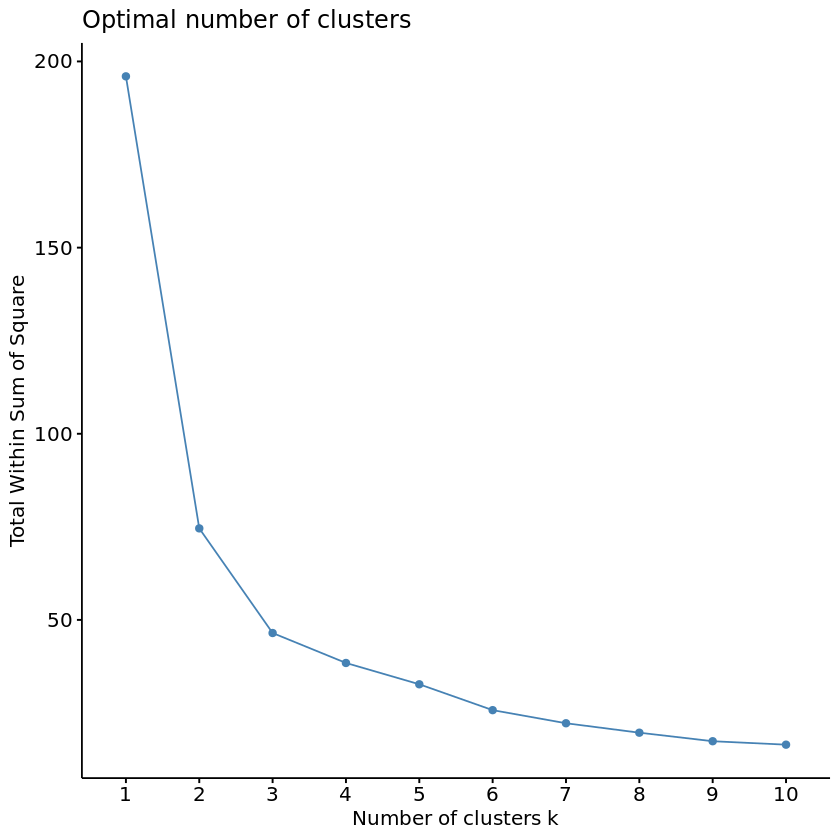

In [ ]:
# Select and scale the relevant features and store as k_means_data
k_means_data <- degrees_clean %>%
    select(Starting.Median.Salary, Mid.Career.Median.Salary, Percentile.10, Percentile.90)   %>% 
    scale()

# Run the fviz_nbclust function with our selected data and method "wss"
elbow_method <- fviz_nbclust(k_means_data, FUNcluster = kmeans, method = "wss")

# View the plot
elbow_method

## 4. The silhouette method
<p>Wow, that <code>fviz_nbclust</code> function was pretty nifty. Instead of needing to "manually" apply the elbow method by running multiple k_means models and plotting the calculated the total within cluster sum of squares for each potential value of k, <code>fviz_nbclust</code> handled all of this for us behind the scenes. Can we use it for the <strong>Silhouette Method</strong> as well? The Silhouette Method will evaluate the quality of clusters by how well each point fits within a cluster, maximizing average "silhouette" width.</p>

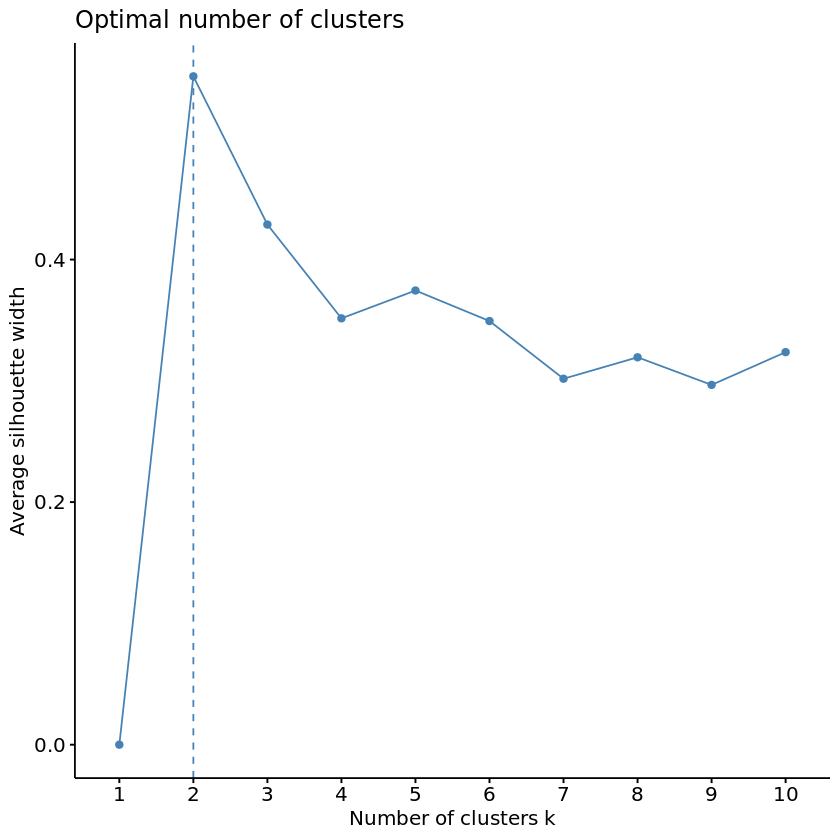

In [ ]:
# Run the fviz_nbclust function with the method "silhouette" 
silhouette_method <- fviz_nbclust(k_means_data, FUNcluster = kmeans, method = "silhouette")

# View the plot
silhouette_method

## 5. The gap statistic method
<p>Marvelous! But hmm, it seems that our two methods so far disagree on the optimal number of clusters... Time to pull out the tie breaker.</p>
<p>For our final method, let's see what the <strong>Gap Statistic Method</strong> has to say about this. The Gap Statistic Method will compare the total variation within clusters for different values of <em>k</em> to the null hypothesis, maximizing the "gap." The "null hypothesis" refers to a uniformly distributed <em>simulated reference</em> dataset with no observable clusters, generated by aligning with the principle components of our original dataset. In other words, how much more variance is explained by <em>k</em> clusters in our dataset than in a fake dataset where all majors have equal salary potential? </p>
<p>Fortunately, we have the <code>clusGap</code> function to calculate this behind the scenes and the <code>fviz_gap_stat</code> function to visualize the results.</p>

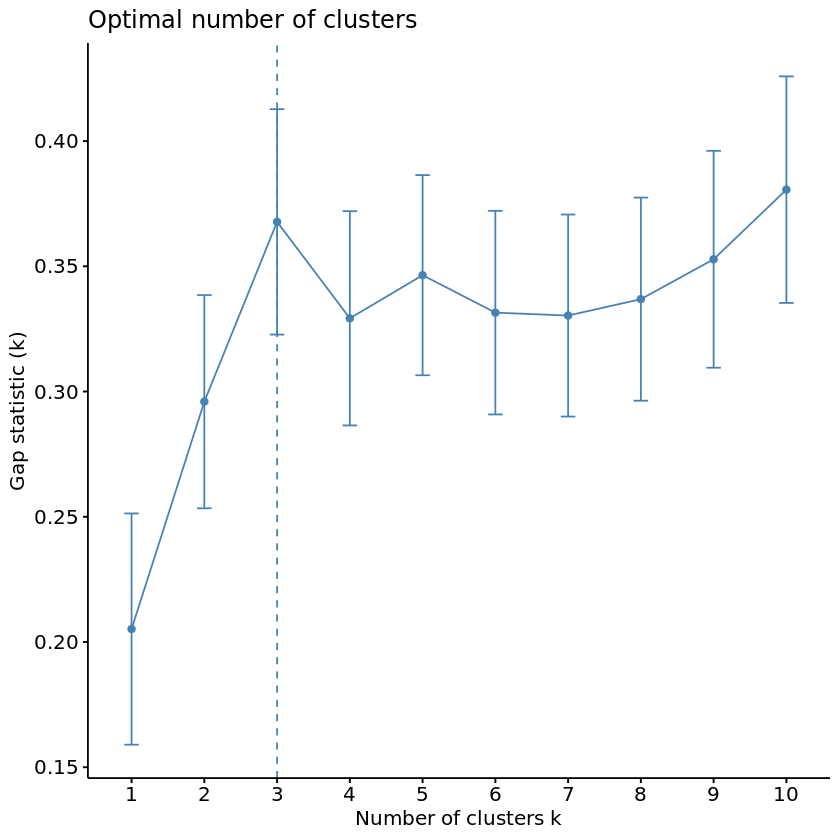

In [ ]:
# Use the clusGap function to apply the Gap Statistic Method
gap_stat <- clusGap(k_means_data, FUN = kmeans, nstart = 25, K.max = 10, B = 50)

# Use the fviz_gap_stat function to vizualize the results
gap_stat_method <- fviz_gap_stat(gap_stat)

# View the plot
gap_stat_method

## 6. K-means algorithm
<p>Looks like the Gap Statistic Method agreed with the Elbow Method! According to majority rule, let's use 3 for our optimal number of clusters. With this information, we can now run our k-means algorithm on the selected data. We will then add the resulting cluster information to label our original dataframe.</p>

In [ ]:
# Set a random seed
set.seed(111)

# Set k equal to the optimal number of clusters
num_clusters <- 3

# Run the k-means algorithm 
k_means <- kmeans(k_means_data, centers = num_clusters, iter.max = 15, nstart = 25)

# Label the clusters of degrees_clean
degrees_labeled <- degrees_clean %>%
    mutate(clusters = k_means$cluster)

## 7. Visualizing the clusters
<p>Now for the pretty part: visualizing our results. First let's take a look at how each cluster compares in Starting vs. Mid Career Median Salaries. What do the clusters say about the relationship between Starting and Mid Career salaries?</p>

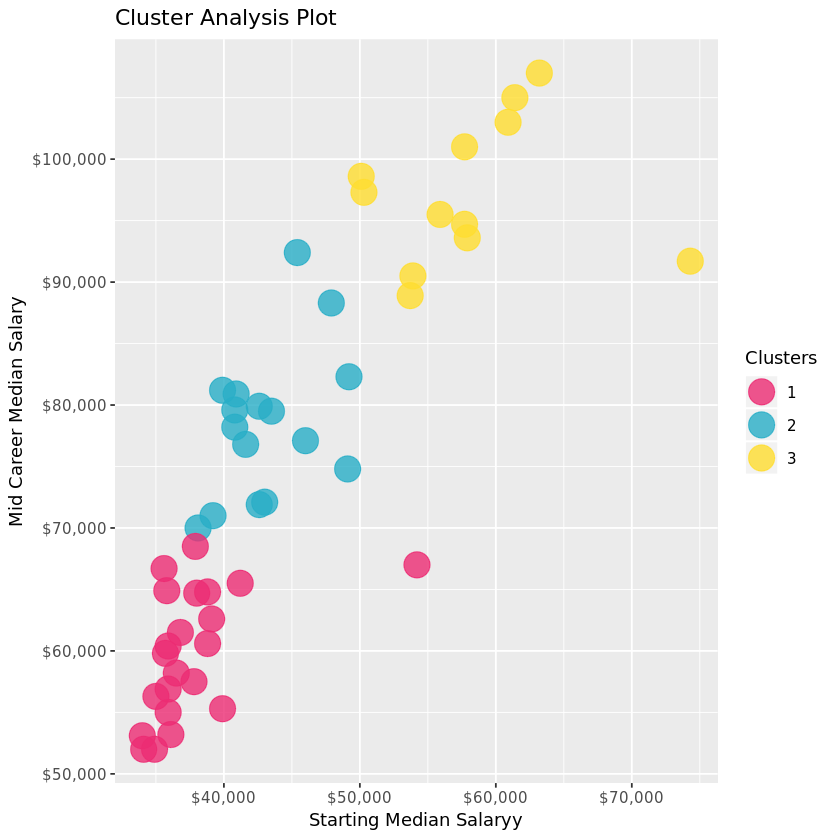

In [ ]:
# Graph the clusters by Starting and Mid Career Median Salaries
career_growth <- ggplot(degrees_labeled, aes(x = Starting.Median.Salary, y = Mid.Career.Median.Salary, color=factor(clusters))) +
                        geom_point(alpha = 4/5, size = 7) +
                        scale_x_continuous(labels = scales::dollar) +
                        scale_y_continuous(labels = scales::dollar) +
                        xlab("Starting Median Salaryy") +
                        ylab("Mid Career Median Salary") +
                        ggtitle("Cluster Analysis Plot") +
                        scale_color_manual(values = c("#EC2C73","#29AEC7","#FFDD30"), name = "Clusters")

    
# View the plot
career_growth

## 8. A deeper dive into the clusters
<p>Unsurprisingly, most of the data points are hovering in the top left corner, with a relatively linear relationship. In other words, the higher your starting salary, the higher your mid career salary. The three clusters provide a level of delineation that intuitively supports this. </p>
<p>How might the clusters reflect potential mid career growth? There are also a couple curious outliers from clusters 1 and 3... perhaps this can be explained by investigating the mid career percentiles further, and exploring which majors fall in each cluster.</p>
<p>Right now, we have a column for each percentile salary value. In order to visualize the clusters and majors by mid career percentiles, we'll need to reshape the <code>degrees_labeled</code> data using tidyr's <code>gather</code> function to make a <code>percentile</code> <em>key</em> column and a <code>salary</code> <em>value</em> column to use for the axes of our following graphs. We'll then be able to examine the contents of each cluster to see what stories they might be telling us about the majors.</p>

In [ ]:
# Use the gather function to reshape degrees and 
# use mutate() to reorder the new percentile column
degrees_perc <- degrees_labeled %>%
    select(College.Major, Percentile.10, Percentile.25, Mid.Career.Median.Salary, Percentile.75, Percentile.90, clusters)  %>% 
    gather("percentile", "salary", -c(College.Major, clusters))  %>% 
    mutate(percentile = factor(percentile, levels = c('Percentile.10','Percentile.25','Mid.Career.Median.Salary','Percentile.75', 'Percentile.90')))

## 9. The liberal arts cluster
<p>Let's graph Cluster 1 and examine the results. These Liberal Arts majors may represent the lowest percentiles with limited growth opportunity, but there is hope for those who make it! Music is our riskiest major with the lowest 10th percentile salary, but Drama wins the highest growth potential in the 90th percentile for this cluster (so don't let go of those Hollywood dreams!). Nursing is the outlier culprit of cluster number 1, with a higher safety net in the lowest percentile to the median. Otherwise, this cluster does represent the majors with limited growth opportunity.</p>
<p>An aside: It's worth noting that most of these majors leading to lower-paying jobs are women-dominated, according to this <a href="https://www.glassdoor.com/research/app/uploads/sites/2/2017/04/FULL-STUDY-PDF-Gender-Pay-Gap2FCollege-Major.pdf">Glassdoor study</a>. According to the research:</p>
<blockquote>
  <p>"The single biggest cause of the gender pay gap is occupation and industry sorting of men and women into jobs that pay differently throughout the economy. In the U.S., occupation and industry sorting explains 54 percent of the overall pay gap—by far the largest factor." </p>
</blockquote>
<p>Does this imply that women are statistically choosing majors with lower pay potential, or do certain jobs pay less because women choose them...?</p>

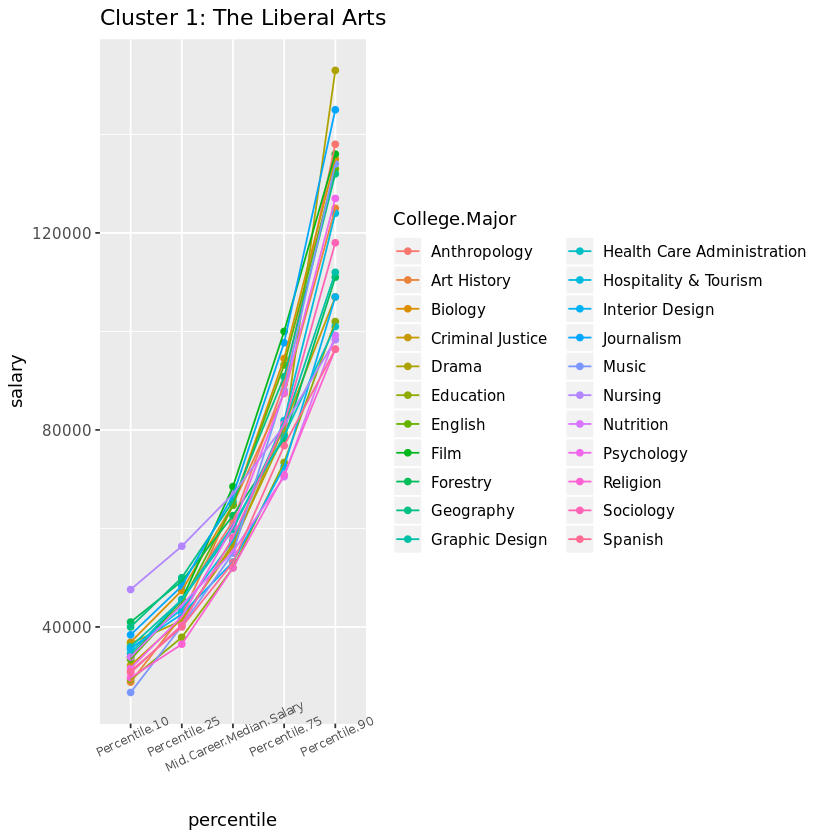

In [ ]:
# Graph the majors of Cluster 1 by percentile
cluster_1 <- degrees_perc  %>% 
    filter(clusters == 1)  %>% 
    ggplot(aes(percentile, salary, group = College.Major, color = College.Major)) +
    geom_point() +
    geom_line() +
    ggtitle("Cluster 1: The Liberal Arts") +
    theme(axis.text.x = element_text(size = 7, angle = 25))

# View the plot
cluster_1

## 10. The goldilocks cluster
<p>On to Cluster 2, right in the middle! Accountants are known for having stable job security, but once you're in the big leagues you may be surprised to find that Marketing or Philosophy can ultimately result in higher salaries. The majors of this cluster are fairly middle of the road in our dataset, starting off not too low and not too high in the lowest percentile. However, this cluster also represents the majors with the greatest differential between the lowest and highest percentiles.</p>

In [ ]:
# Modify the previous plot to display Cluster 2
cluster_2 <- degrees_perc  %>% 
    filter(clusters == 2)  %>% 
    ggplot(aes(percentile, salary, group = College.Major, color = College.Major)) +
    geom_point() +
    geom_line() +
    ggtitle("Cluster 2: The Goldilocks") +
    theme(axis.text.x = element_text(size = 7, angle = 25))

# View the plot
cluster_2

## 11. The over achiever cluster
<p>Finally, let's visualize Cluster 3. If you want financial security, these are the majors to choose from. Besides our one previously observed outlier now identifiable as Physician Assistant lagging in the highest percentiles, these heavy hitters and solid engineers represent the highest growth potential in the 90th percentile, as well as the best security in the 10th percentile rankings. Maybe those Freakonomics guys are on to something...</p>

In [ ]:
# Modify the previous plot to display Cluster 3
cluster_3 <- ....

# View the plot
cluster_3

## 12. Every major's wonderful
<p>Thus concludes our journey exploring salary projections by college major via a k-means clustering analysis! Dealing with unsupervized data always requires a bit of creativity, such as our usage of three popular methods to determine the optimal number of clusters. We also used visualizations to interpret the patterns revealed by our three clusters and tell a story. </p>
<p>Which two careers tied for the highest career percent growth? While it's tempting to focus on starting career salaries when choosing a major, it's important to also consider the growth potential down the road. Keep in mind that whether a major falls into the Liberal Arts, Goldilocks, or Over Achievers cluster, one's financial destiny will certainly be influenced by numerous other factors including the school attended, location, passion or talent for the subject, and of course the actual career(s) pursued. </p>
<p>A similar analysis to evaluate these factors may be conducted on the additional data provided by the Wall Street Journal article, comparing salary potential by type and region of college attended. But in the meantime, here's some inspiration from <a href="https://xkcd.com/1052/">xkcd</a> for any students out there still struggling to choose a major.</p>

In [ ]:
# Sort degrees by Career.Percent.Growth
# .... YOUR CODE FOR TASK 12 ....

# Identify the two majors tied for highest career growth potential
highest_career_growth <- c('....','....')